<a href="https://colab.research.google.com/github/ShahriarParib/ML-Related-Codes/blob/main/Ridge_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from sklearn.datasets import load_diabetes

In [4]:
data=load_diabetes()

In [5]:
print(data.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

In [6]:
X=data.data
y=data.target

In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=40)

In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
lr =LinearRegression()

In [20]:
lr.fit(X_train,y_train)

LinearRegression()

In [21]:
y_pred=lr.predict(X_test)

In [22]:
from sklearn.metrics import r2_score,mean_squared_error

In [25]:
print("R2",r2_score(y_test,y_pred))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))

R2 0.35116056151211583
RMSE 64.72786550400936


In [26]:
from sklearn.linear_model import Ridge

In [27]:
r=Ridge(alpha=0.0001)

In [28]:
r.fit(X_train,y_train)

Ridge(alpha=0.0001)

In [29]:
y_pred1=r.predict(X_test)

In [30]:
print("R2",r2_score(y_test,y_pred1))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred1)))

R2 0.35132143471537525
RMSE 64.71984069542467


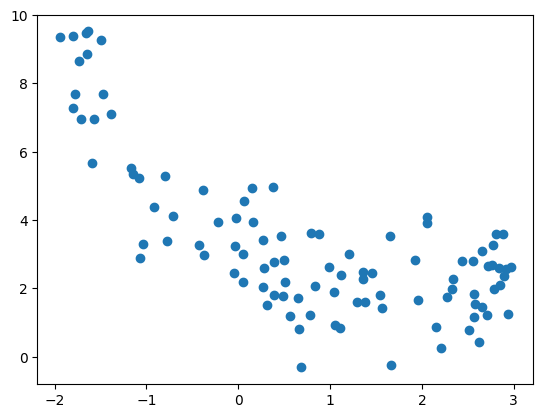

In [31]:
m = 100
x1 = 5 * np.random.rand(m, 1) - 2
x2 = 0.7 * x1 ** 2 - 2 * x1 + 3 + np.random.randn(m, 1)

plt.scatter(x1, x2)
plt.show()

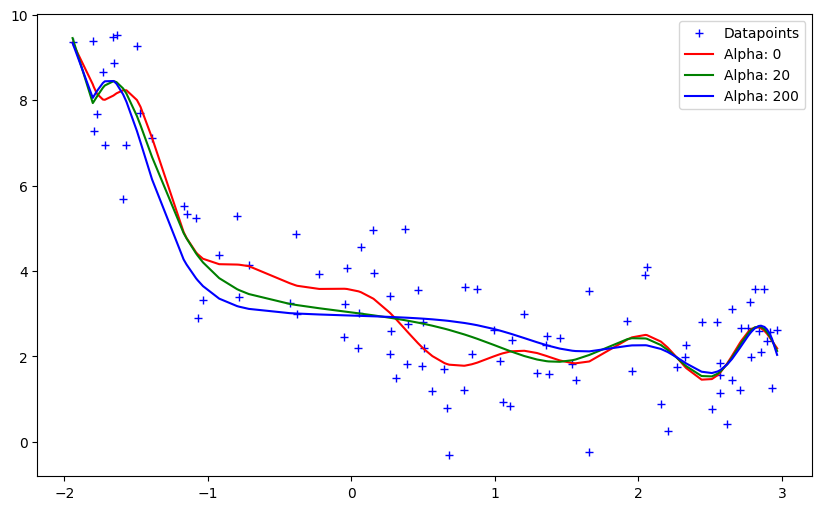

In [32]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

def get_preds_ridge(x1, x2, alpha):
    model = Pipeline([
        ('poly_feats', PolynomialFeatures(degree=16)),
        ('ridge', Ridge(alpha=alpha))
    ])
    model.fit(x1, x2)
    return model.predict(x1)

alphas = [0, 20, 200]
cs = ['r', 'g', 'b']

plt.figure(figsize=(10, 6))
plt.plot(x1, x2, 'b+', label='Datapoints')

for alpha, c in zip(alphas, cs):
    preds = get_preds_ridge(x1, x2, alpha)
    # Plot
    plt.plot(sorted(x1[:, 0]), preds[np.argsort(x1[:, 0])], c, label='Alpha: {}'.format(alpha))

plt.legend()
plt.show()

In [49]:
from sklearn.datasets import make_regression
X,y = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1,noise=20,random_state=10)

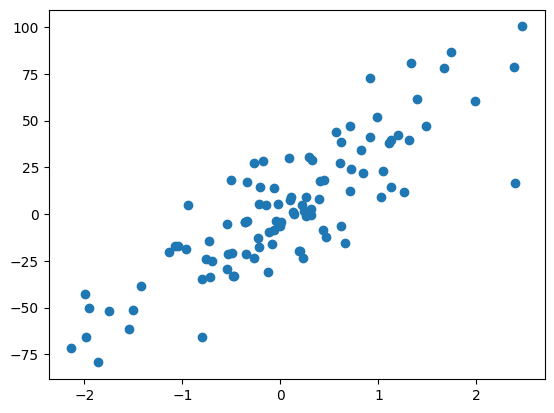

In [50]:
plt.scatter(X,y)

In [51]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X,y)
print(lr.coef_)
print(lr.intercept_)

[31.34493951]
1.0560830217516393


In [37]:
from sklearn.linear_model import Ridge


In [52]:
rr = Ridge(alpha=10)
rr.fit(X,y)
print(rr.coef_)
print(rr.intercept_)

[28.31692669]
1.2965576951719218


In [53]:
rr1 = Ridge(alpha=100)
rr1.fit(X,y)
print(rr1.coef_)
print(rr1.intercept_)

[15.14738848]
2.342438471999783


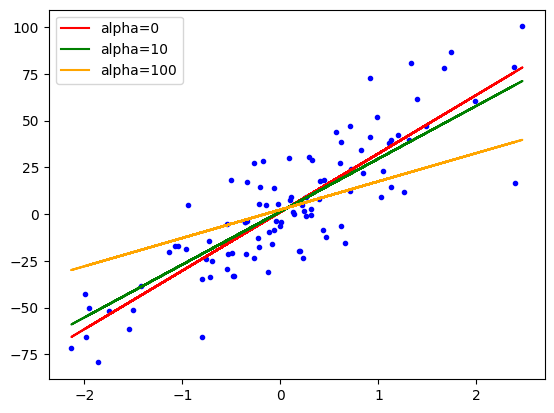

In [54]:
plt.plot(X,y,'b.')
plt.plot(X,lr.predict(X),color='red',label='alpha=0')
plt.plot(X,rr.predict(X),color='green',label='alpha=10')
plt.plot(X,rr1.predict(X),color='orange',label='alpha=100')
plt.legend()


In [67]:
class Myridge:
  def __init__(self, alpha=0.1):
    self.alpha = alpha
    self.coef_ = None
    self.intercept_ = None
  def fit(self,X_train,y_train):
    num=0
    den=0
    for i in range(X_train.shape[0]):
      num=num+(y_train[i]-y_train.mean())*(X_train[i]-X_train.mean())
      den=den+(X_train[i]-X_train.mean())*(X_train[i]-X_train.mean())

    self.coef_=num/(den+self.alpha)
    self.intercept_=y_train.mean()-(self.coef_*X_train.mean())
    print(self.coef_,self.intercept_)
  def predict(self,X_test):
    return self.intercept_+np.dot(X_test,self.coef_)

In [68]:
rid=Myridge(alpha=100)

In [69]:
rid.fit(X,y)


[15.14738848] [2.34243847]
